In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from mlxtend.plotting import plot_decision_regions

ModuleNotFoundError: No module named 'mlxtend'

In [20]:
#load dataset + drop null
df = pd.read_csv('responses.csv')
df = df.dropna()

newDf = df[["Music","Slow songs or fast songs","Dance","Folk","Country","Classical music","Musical","Pop","Rock","Metal or Hardrock","Punk","Hiphop, Rap","Reggae, Ska","Swing, Jazz","Rock n roll","Alternative","Latino","Techno, Trance","Opera","Smoking"]]
# newDf = df[["Smoking","Alcohol","Healthy eating","Slow songs or fast songs"]]

In [21]:
#check null value
newDf.isna().values.any()

False

In [22]:
#replace d kolom smoking never smoke dan tried dgn 0 dan former dan current dengan 1
newDf[['Smoking']] = newDf[['Smoking']].replace({'never smoked': 0, 'tried smoking': 0, 'former smoker': 1, 'current smoker': 1})
# newDf[['Alcohol']] = newDf[['Alcohol']].replace({'never': 0, 'social drinker': 1, 'drink a lot': 2})

C:\Users\Albert\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [23]:
#check null value
newDf.isna().values.any()

False

In [24]:
#check value smoking
newDf[['Smoking']].values

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [25]:
#correlation 
newDf.corr(method='pearson')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Smoking
Music,1.000000,0.079243,0.079587,0.065234,0.004119,0.092681,0.065404,0.053930,0.162643,0.020999,0.084596,0.062623,0.039235,0.092354,0.112154,0.128613,0.058902,0.058988,0.062045,0.075130
Slow songs or fast songs,0.079243,1.000000,0.122408,-0.069242,-0.109378,-0.155253,-0.093498,0.024410,0.011693,0.064762,0.056187,0.098162,0.026369,-0.124804,-0.006935,-0.004311,-0.028030,0.145749,-0.160950,0.051806
Dance,0.079587,0.122408,1.000000,0.091042,0.061305,-0.093182,0.121614,0.452687,-0.150469,-0.258661,-0.161762,0.400690,0.125396,0.042746,-0.040377,-0.158017,0.312190,0.404878,-0.065941,0.041485
Folk,0.065234,-0.069242,0.091042,1.000000,0.389059,0.374284,0.252281,0.015599,0.103242,0.067313,0.036217,-0.088376,0.106709,0.274637,0.199045,0.168131,0.247640,-0.025736,0.329402,-0.087859
Country,0.004119,-0.109378,0.061305,0.389059,1.000000,0.235070,0.199446,-0.006747,0.135381,0.106008,0.064509,-0.081983,0.119427,0.219604,0.292080,0.058013,0.163909,0.017984,0.228586,-0.088944
Classical music,0.092681,-0.155253,-0.093182,0.374284,0.235070,1.000000,0.369181,-0.051817,0.184845,0.149890,0.072537,-0.151233,0.025927,0.420274,0.266450,0.305320,0.134714,-0.024026,0.599296,-0.084942
Musical,0.065404,-0.093498,0.121614,0.252281,0.199446,0.369181,1.000000,0.215884,0.063993,-0.059421,-0.019241,-0.022846,0.089765,0.250542,0.206267,0.062952,0.352344,-0.065102,0.419671,-0.090138
Pop,0.053930,0.024410,0.452687,0.015599,-0.006747,-0.051817,0.215884,1.000000,-0.043662,-0.303731,-0.169088,0.293387,0.017263,-0.034342,-0.017564,-0.219839,0.281049,0.174364,-0.069098,-0.024345
Rock,0.162643,0.011693,-0.150469,0.103242,0.135381,0.184845,0.063993,-0.043662,1.000000,0.533176,0.514398,-0.209140,0.130062,0.212503,0.486771,0.346116,-0.047623,-0.096778,0.106804,0.028254
Metal or Hardrock,0.020999,0.064762,-0.258661,0.067313,0.106008,0.149890,-0.059421,-0.303731,0.533176,1.000000,0.529328,-0.233080,0.076924,0.101785,0.284223,0.275359,-0.144692,-0.036622,0.129903,0.045561


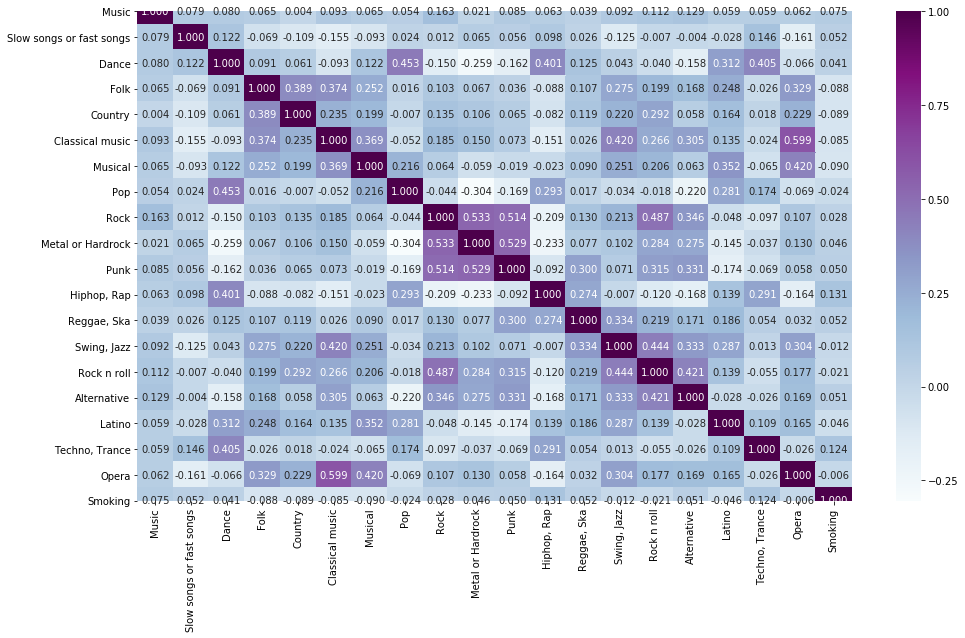

In [26]:
#correlation matrix
plt.figure(figsize=(16,9))
sns.heatmap(newDf.corr(method='pearson'), annot=True, fmt='.3f', cmap='BuPu')

   Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   
5    5.0                       3.0    2.0   3.0      2.0              3.0   

   Musical  Pop  Rock  Metal or Hardrock  Punk  Hiphop, Rap  Reggae, Ska  \
0      1.0  5.0   5.0                1.0   1.0          1.0          1.0   
1      2.0  3.0   5.0                4.0   4.0          1.0          3.0   
2      5.0  3.0   5.0                3.0   4.0          1.0          4.0   
4      3.0  5.0   3.0                1.0   2.0          5.0          3.0   
5      3.0  2.0   5.0                5.0   3.0          4.0          3.0   

   Swing, Jazz  Rock n roll  Alternative  Latino  Techno, Trance  Opera  \
0    

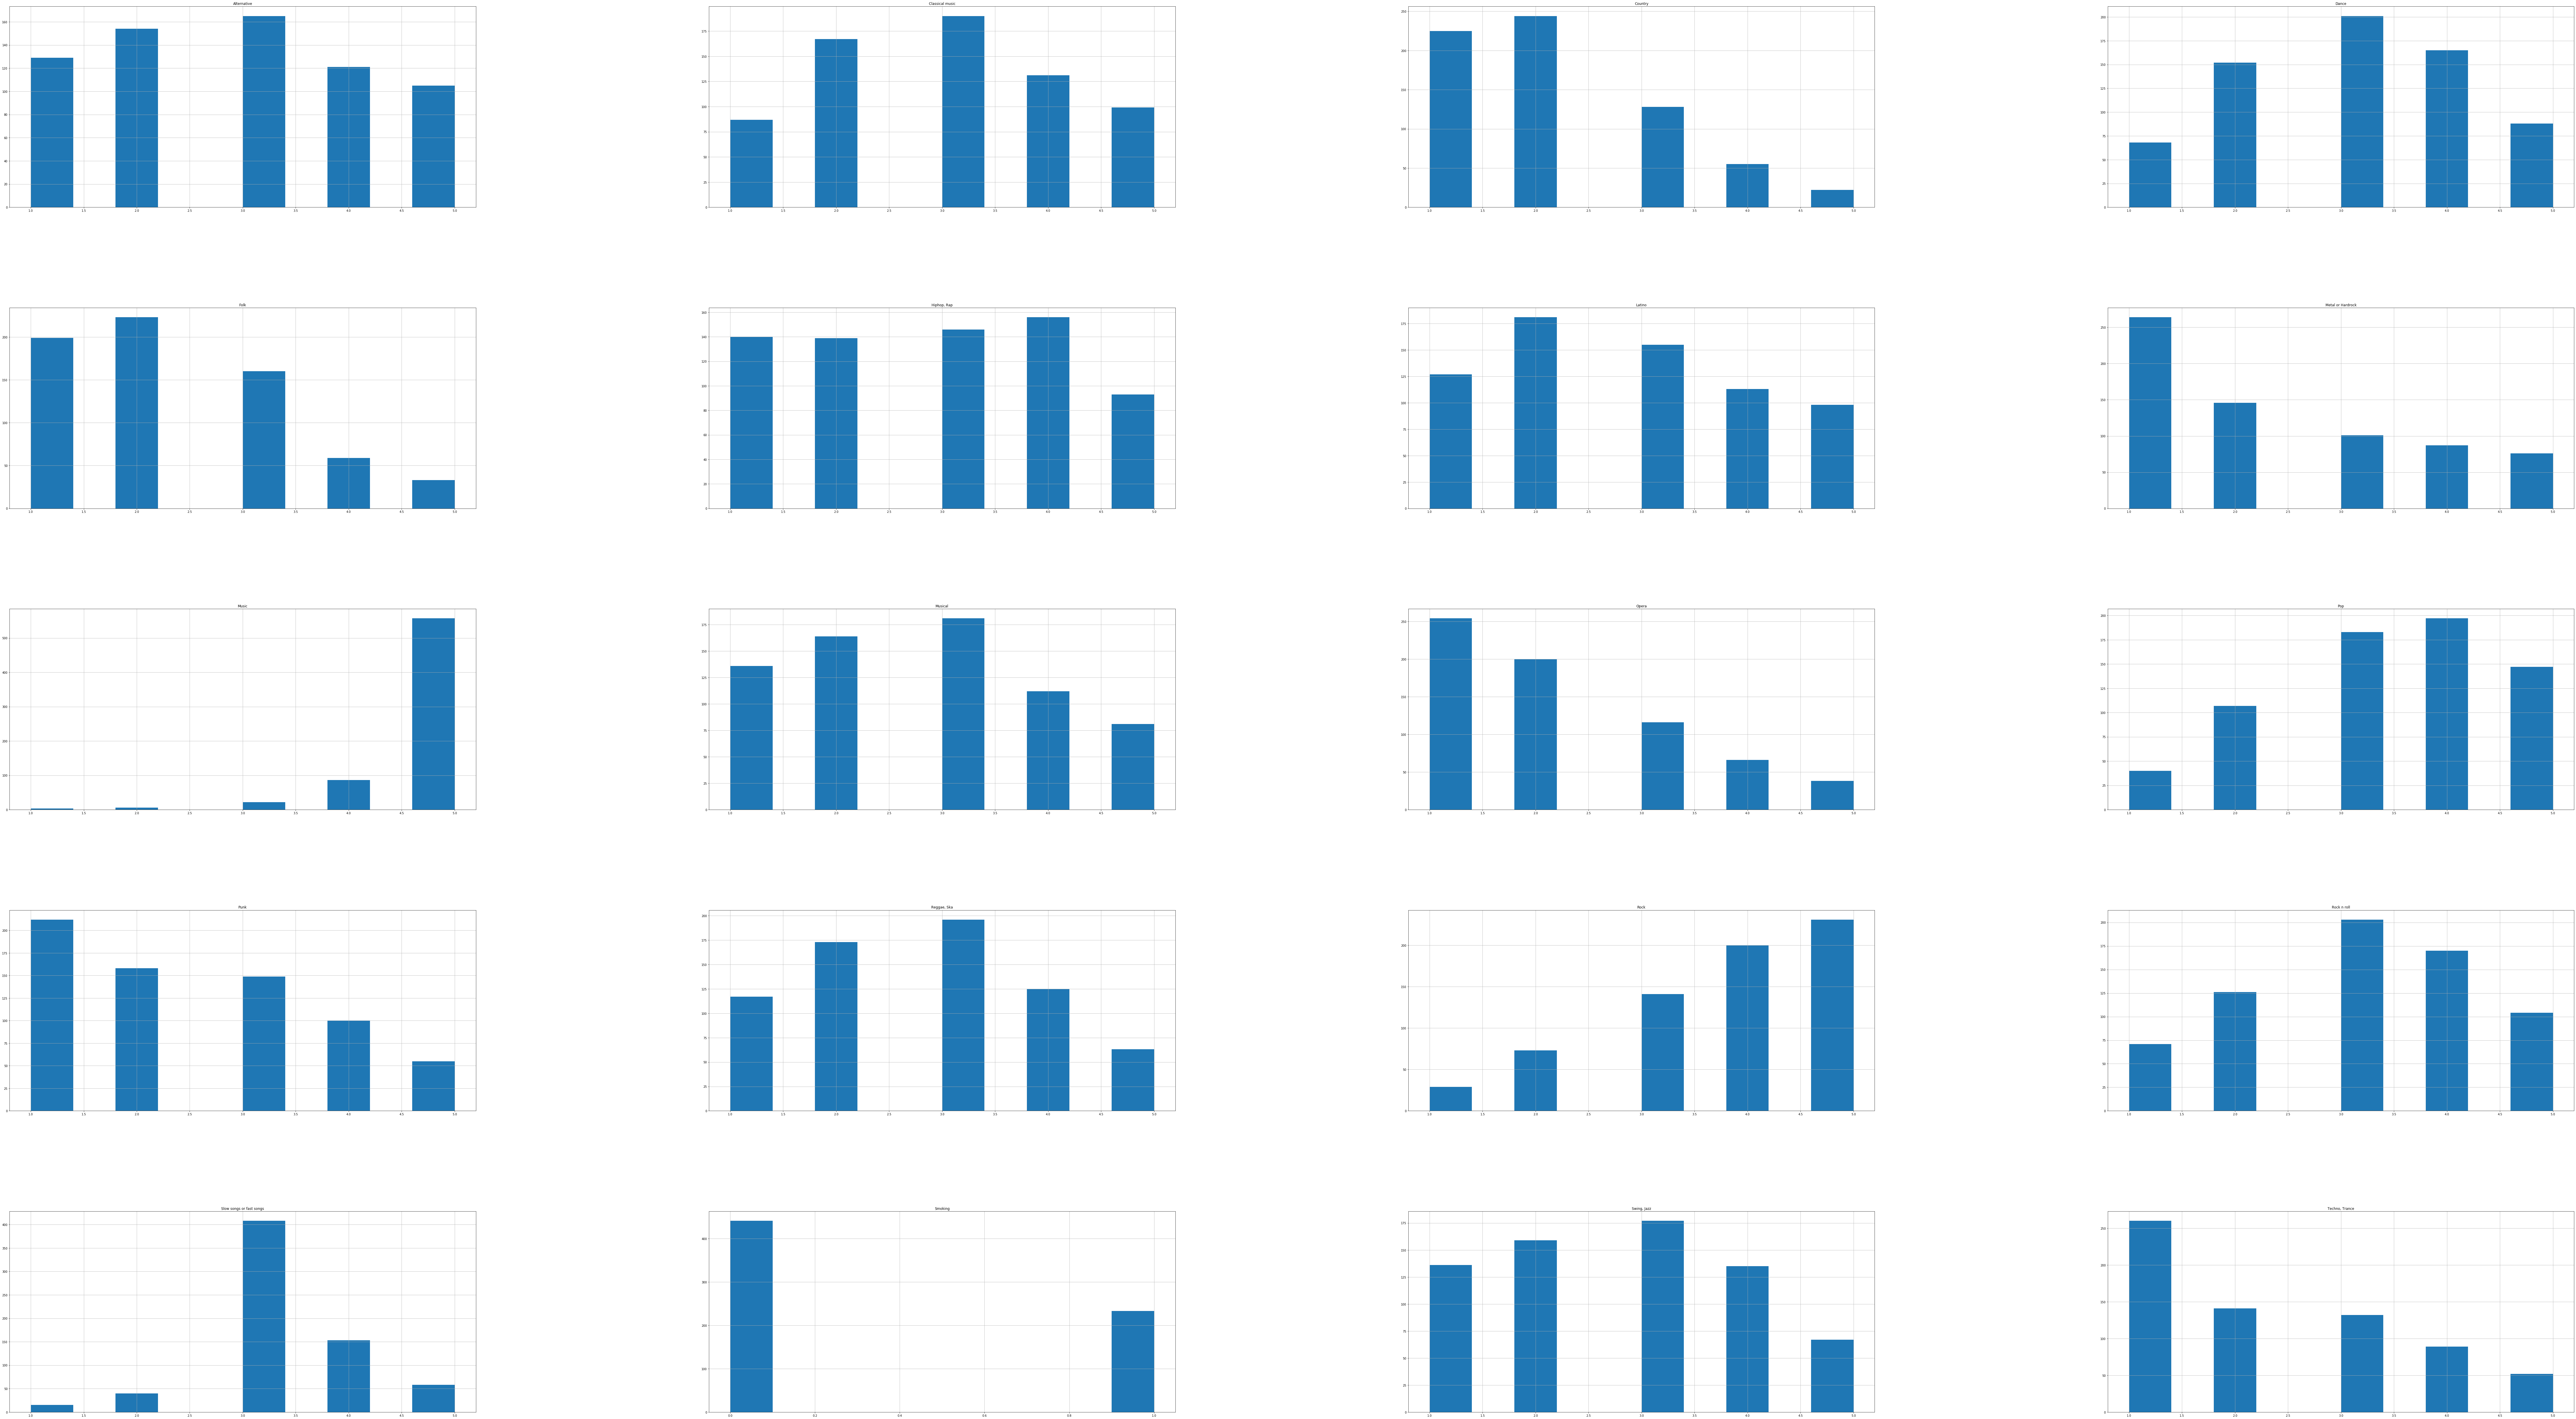

In [27]:
#histogram 
featPred = newDf[["Music","Slow songs or fast songs","Dance","Folk","Country","Classical music","Musical","Pop","Rock","Metal or Hardrock","Punk","Hiphop, Rap","Reggae, Ska","Swing, Jazz","Rock n roll","Alternative","Latino","Techno, Trance","Opera","Smoking"]]
print(featPred.head())

featPred.hist()
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.rcParams["figure.figsize"] = [160,90]
plt.show()

In [28]:
# ### No. 4 (Learning Model)

# train, test = train_test_split(newDf, test_size=0.2)
# regLin = linear_model.LinearRegression()
# regLin.fit(train[["Music","Slow songs or fast songs","Dance","Folk","Country","Classical music","Musical","Pop","Rock","Metal or Hardrock","Punk","Hiphop, Rap","Reggae, Ska","Swing, Jazz","Rock n roll","Alternative","Latino","Techno, Trance","Opera"]], train[['Smoking']])

# print('Length of Training Set: ', len(train))
# print('Length of Test Set: ', len(test))
# print()


# print('Coefficients: ', regLin.coef_)
# print('Intercept: ',regLin.intercept_)

In [29]:
# ### No. 5 (Evaluasi)

# prediction = regLin.predict(test[["Music","Slow songs or fast songs","Dance","Folk","Country","Classical music","Musical","Pop","Rock","Metal or Hardrock","Punk","Hiphop, Rap","Reggae, Ska","Swing, Jazz","Rock n roll","Alternative","Latino","Techno, Trance","Opera"]])

# print("Mean Absolute Error (MAE): ", mean_absolute_error(test[["Smoking"]], prediction))
# print("Mean Squared Error (MSE): ", mean_squared_error(test[["Smoking"]], prediction))
# print("R2: ", r2_score(test[["Smoking"]], prediction))

In [30]:
X = newDf[["Music","Slow songs or fast songs","Dance","Folk","Country","Classical music","Musical","Pop","Rock","Metal or Hardrock","Punk","Hiphop, Rap","Reggae, Ska","Swing, Jazz","Rock n roll","Alternative","Latino","Techno, Trance","Opera"]].values
y = newDf[["Smoking"]].values

In [31]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# x = music
# y = health[['Smoking']]

# def knn_comparison(k):    
#     clf = neighbors.KNeighborsClassifier(n_neighbors=k)
#     clf.fit(x, y)# Plotting decision region
#     plot_decision_regions(x, y, clf=clf, legend=2)# Adding axes annotations
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title('Knn with K=' + str(k))
#     plt.show()

In [32]:
#applying decision tree
classifier = DecisionTreeClassifier (random_state = 0,max_depth=3, min_samples_leaf=5)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [33]:
#print confusion matrix
df_table = confusion_matrix(y_test, y_pred)
df_table


# newClassification = KNN.predict([[1,5],[3]])
# print(newClassification)

# for i in [1,5,20,30,40,60]:
#     knn_comparison(i)

array([[65, 16],
       [40, 14]], dtype=int64)

In [34]:
#find accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 58.52 %.


In [35]:
#find preciison recall and f1 score
precision = df_table[0,0] / (df_table[0,0] + df_table[0,1])
recall = df_table[0,0] / (df_table[0,0] + df_table[1,0])
print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] +df_table[1,0]+df_table[1,1]))
print ('precision:', precision )
print('recall:', recall)
print('f1 score: ', (2*precision*recall)/(precision+recall))

accuracy: 0.5851851851851851
precision: 0.8024691358024691
recall: 0.6190476190476191
f1 score:  0.6989247311827957
